### Підключення необхідних бібліотек:

In [69]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.express as px

### Завантаження набору даних:

In [70]:
df = pd.read_csv('SpotifyFeatures.csv')

### Виводимо кілька перших рядків набору даних:

In [71]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


### Статистика колонок:

In [72]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


### Стандартизація числових ознак:

In [73]:
# Знаходимо числові колонки
num_feat = df.select_dtypes(include=['number']).columns.tolist()
print(f"\nЧислові колонки: {num_feat}")

# Стандартизація
df_scaled = df.copy()
df_scaled[num_feat] = StandardScaler().fit_transform(df[num_feat])

print("\nСтандартизовані дані:")
print(df_scaled.head())

# Фільтрація для візуалізації
df_viz = df_scaled[df['popularity'] >= 85].copy()

print(f"\n\nПісля фільтрації (popularity >= 85):")
print(f"Розмір: {df_viz.shape}")
print(df_viz.head())


Числові колонки: ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

Стандартизовані дані:
   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV   -2.261007      0.683376     -0.890935   
1  0BjC1NfoEOOusryehmNudP   -2.206031     -0.345467      0.191994   
2  0CoSDzoNIKCRs124s9uTVy   -2.096080      1.644570      0.585296   
3  0Gc6TVm52BwZD07Ki6tIvf   -2.261007      0.942701     -1.693703   
4  0IuslXpMROHdEPvSl1fTQK   -2.041104      1.638932     -1.203422   

  

### Почнемо етап підбору оптимальної кількості кластерів:

In [74]:
# Діапазон кількості кластерів для тестування
k_range = range(2, 16)

# Список для збереження інерції
inertias = []

# Проходимо по всіх значеннях k
for k in k_range:
    # Ініціалізуємо KMeans з k кластерами
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=13)
    
    # Навчаємо модель на стандартизованих даних
    kmeans.fit(df_scaled[num_feat])
    
    # Зберігаємо інерцію (сума квадратів відстаней до центрів)
    inertias.append(kmeans.inertia_)
    
    print(f"k={k}: inertia={inertias[-1]:.2f}")

k=2: inertia=1954726.38
k=3: inertia=1661583.45
k=4: inertia=1523334.60
k=5: inertia=1407101.08
k=6: inertia=1331154.06
k=7: inertia=1261544.52
k=8: inertia=1198102.73
k=9: inertia=1136460.88
k=10: inertia=1086790.38
k=11: inertia=1045853.81
k=12: inertia=1009924.50
k=13: inertia=978180.56
k=14: inertia=954520.30
k=15: inertia=933247.02


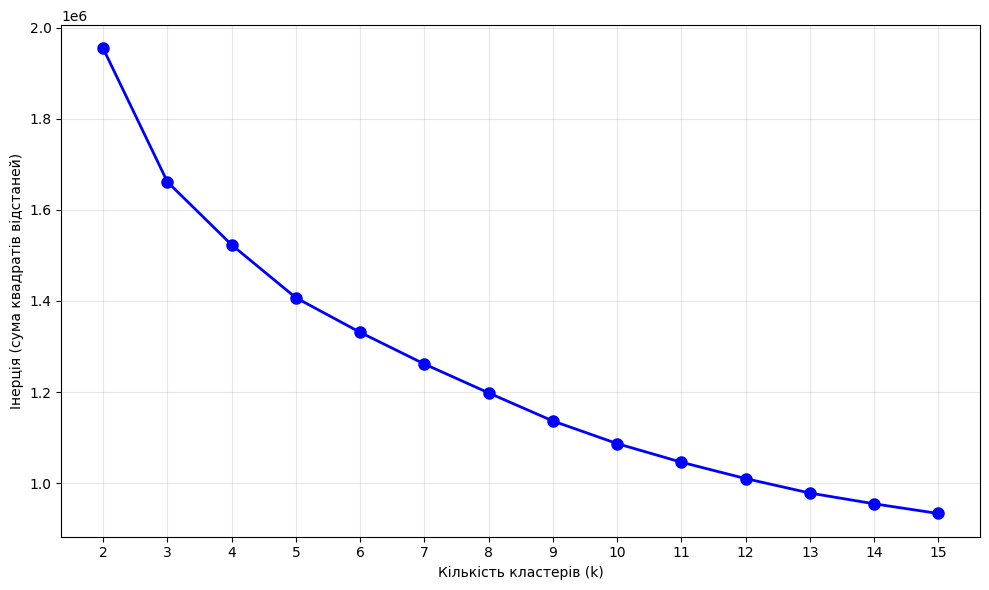

In [75]:
# Будуємо графік для методу ліктя
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='blue')

plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція (сума квадратів відстаней)')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

plt.tight_layout()
plt.show()

### Виконуємо кластеризацію на основі аналізу:

Найбільш вдалим здається кількість кластерів 5, що видно з графіку

In [76]:
opt_k = 5

In [77]:
# Створюємо фінальну модель KMeans з оптимальним k
kmeans_final = KMeans(n_clusters=opt_k, random_state=42, n_init=10)

# Навчаємо модель на стандартизованих даних
kmeans_final.fit(df_scaled[num_feat])

print(f"Кластеризацію виконано з k={opt_k}")
print(f"Інерція фінальної моделі: {kmeans_final.inertia_:.2f}")

Кластеризацію виконано з k=5
Інерція фінальної моделі: 1407101.08


In [78]:
# Отримуємо мітки кластерів для кожного треку
cluster_labels = kmeans_final.labels_

# Додаємо мітки як нову колонку до стандартизованого датафрейму
df_scaled['cluster'] = cluster_labels

# Також додаємо до оригінального датафрейму
df['cluster'] = cluster_labels

print("Перші рядки з мітками кластерів:")
print(df[['track_name', 'artist_name', 'popularity', 'cluster']].head(10))

Перші рядки з мітками кластерів:
                                          track_name          artist_name  \
0                        C'est beau de faire un Show       Henri Salvador   
1                   Perdu d'avance (par Gad Elmaleh)    Martin & les fées   
2                     Don't Let Me Be Lonely Tonight      Joseph Williams   
3                     Dis-moi Monsieur Gordon Cooper       Henri Salvador   
4                                          Ouverture         Fabien Nataf   
5                     Le petit souper aux chandelles       Henri Salvador   
6  Premières recherches (par Paul Ventimila, Lori...    Martin & les fées   
7                                      Let Me Let Go          Laura Mayne   
8                                              Helka               Chorus   
9                          Les bisous des bisounours  Le Club des Juniors   

   popularity  cluster  
0           0        1  
1           1        1  
2           3        4  
3           0      

### Підраховуємо кількість треків у кожному кластері

In [79]:
cluster_counts = df['cluster'].value_counts().sort_index()

for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Кластер {cluster_id}: {count} треків ({percentage:.2f}%)")

Кластер 0: 29443 треків (12.65%)
Кластер 1: 60841 треків (26.14%)
Кластер 2: 87225 треків (37.48%)
Кластер 3: 10108 треків (4.34%)
Кластер 4: 45108 треків (19.38%)


### Виконуємо PCA до трьох компонентів для візуалізації:

In [80]:
from sklearn.decomposition import PCA

# PCA для 3D візуалізації
pca_3d = PCA(n_components=3, random_state=42)
components_3d = pca_3d.fit_transform(df_scaled[num_feat])

# Додаємо компоненти до DataFrame
df_scaled['PC1'] = components_3d[:, 0]
df_scaled['PC2'] = components_3d[:, 1]
df_scaled['PC3'] = components_3d[:, 2]

print(f"3D PCA: {pca_3d.explained_variance_ratio_.sum()*100:.2f}%")
print(f"   PC1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"   PC3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")

3D PCA: 59.02%
   PC1: 32.82%
   PC2: 15.55%
   PC3: 10.65%


In [81]:
# Фільтруємо дані для візуалізації
df_viz = df_scaled[df['popularity'] >= 65].copy()

print(f"Всього треків: {len(df_scaled):,}")
print(f"Для візуалізації: {len(df_viz):,} ({len(df_viz)/len(df_scaled)*100:.2f}%)")

# Статистика по кластерах у відфільтрованих даних
print("\nРозподіл популярних треків по кластерах:")
viz_cluster_counts = df_viz['cluster'].value_counts().sort_index()
for cluster_id, count in viz_cluster_counts.items():
    percentage = (count / len(df_viz)) * 100
    print(f"  Кластер {cluster_id}: {count:,} треків ({percentage:.2f}%)")

Всього треків: 232,725
Для візуалізації: 19,515 (8.39%)

Розподіл популярних треків по кластерах:
  Кластер 0: 74 треків (0.38%)
  Кластер 1: 3,911 треків (20.04%)
  Кластер 2: 13,343 треків (68.37%)
  Кластер 3: 8 треків (0.04%)
  Кластер 4: 2,179 треків (11.17%)


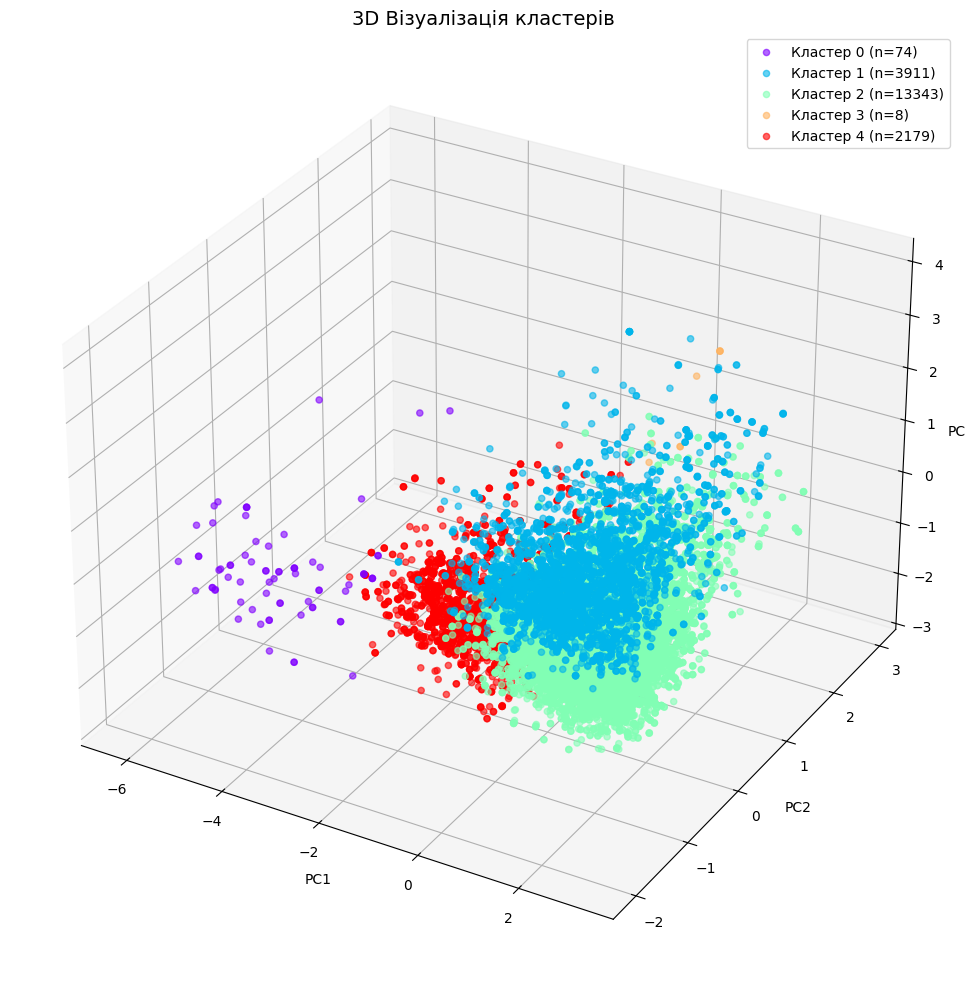

In [82]:
# ========== 3D графік ==========
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Кольори для кластерів
colors = plt.cm.rainbow(np.linspace(0, 1, opt_k))

for cluster_id in range(opt_k):
    cluster_data = df_viz[df_viz['cluster'] == cluster_id]
    ax.scatter(
        cluster_data['PC1'],
        cluster_data['PC2'],
        cluster_data['PC3'],
        c=[colors[cluster_id]],
        label=f'Кластер {cluster_id} (n={len(cluster_data)})',
        alpha=0.6,
        s=20
    )

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'3D Візуалізація кластерів', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Обчислюємо статистичні ознаки для кожного кластера:

In [83]:
# Обчислюємо середні значення ознак для кожного кластера
cluster_stats = df.groupby('cluster')[num_feat].mean()
print(cluster_stats.round(2))

print("\n" + "="*80)

# Додаткова статистика: кількість треків та популярність
cluster_summary = df.groupby('cluster').agg({
    'track_name': 'count',
    'popularity': ['mean', 'std']
}).round(2)

cluster_summary.columns = ['Кількість треків', 'Середня популярність', 'Ст. відхилення популярності']
print(cluster_summary)

         popularity  acousticness  danceability  duration_ms  energy  \
cluster                                                                
0             26.82          0.86          0.29    263165.98    0.16   
1             42.50          0.10          0.50    244797.23    0.77   
2             49.51          0.17          0.70    224922.27    0.68   
3             20.69          0.79          0.56    243765.75    0.66   
4             36.99          0.69          0.53    221555.22    0.35   

         instrumentalness  liveness  loudness  speechiness   tempo  valence  
cluster                                                                      
0                    0.68      0.15    -20.90         0.05  102.04     0.15  
1                    0.10      0.25     -6.00         0.09  145.11     0.45  
2                    0.05      0.17     -6.84         0.11  108.43     0.60  
3                    0.00      0.73    -12.03         0.88   97.95     0.41  
4                    0.09  

### Будуємо хітмапу усіх ознак:

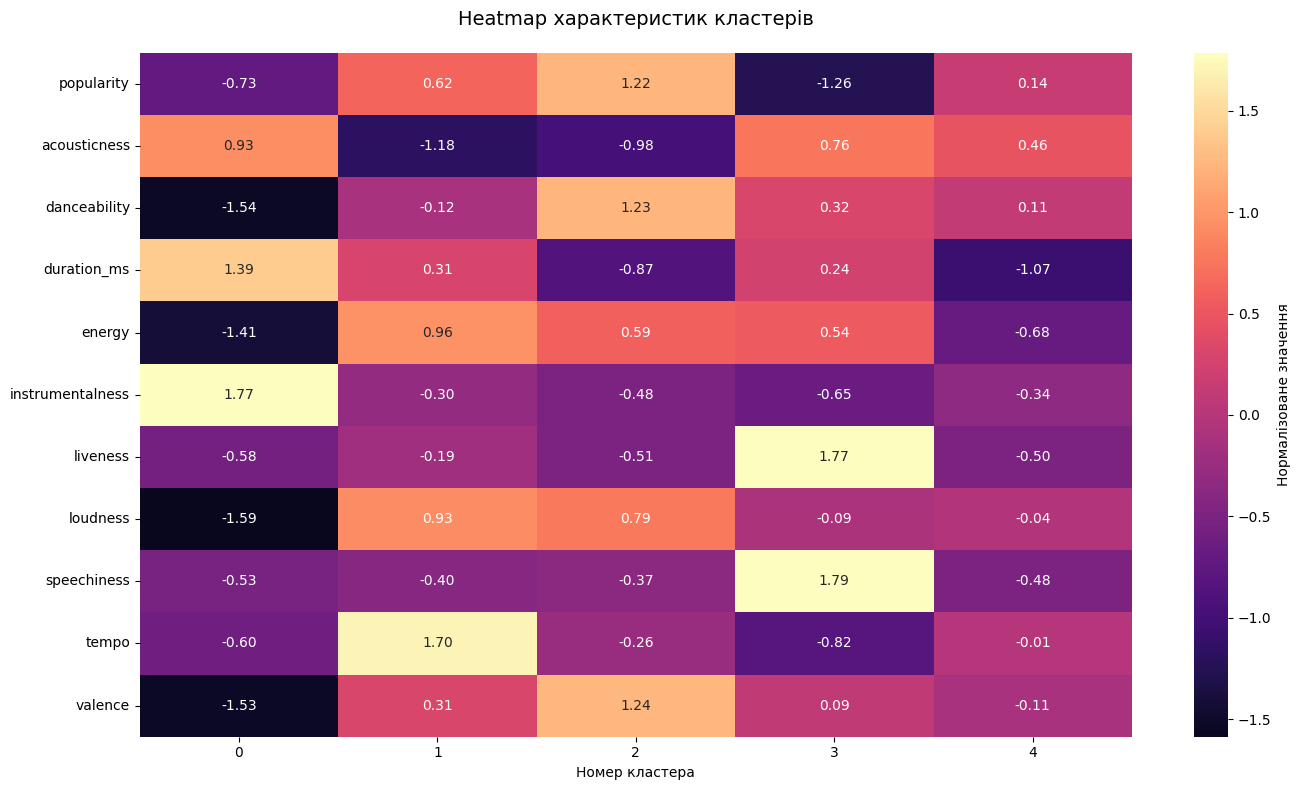

In [84]:
# Heatmap середніх значень
plt.figure(figsize=(14, 8))

# Z-score нормалізація
cluster_stats_norm = (cluster_stats - cluster_stats.mean()) / cluster_stats.std()

sns.heatmap(
    cluster_stats_norm.T,
    annot=True,
    fmt='.2f',
    cmap='magma',
    center=0,
    cbar_kws={'label': 'Нормалізоване значення'},
)

plt.title('Heatmap характеристик кластерів', fontsize=14, pad=20)
plt.xlabel('Номер кластера')
plt.tight_layout()
plt.show()

### Перед інтерпретацією кластерів зручно буде вивести найвищі та найнижчі характеристики:

In [85]:
for cluster_id in range(opt_k):
    print(f"\n{'='*80}")
    print(f"\nКЛАСТЕР {cluster_id} (n={len(df[df['cluster']==cluster_id]):,} треків)")
    
    # Характеристики кластера
    cluster_values = cluster_stats_norm.loc[cluster_id]
    
    # ТОП-5 найвищих характеристик
    top_high = cluster_values.nlargest(5)
    print(f"\nВИСОКІ характеристики:")
    for feature, value in top_high.items():
        original_value = cluster_stats.loc[cluster_id, feature]
        print(f"   - {feature:20s}: {value:+.2f} (значення: {original_value:.2f})")
    
    # ТОП-5 найнижчих характеристик
    top_low = cluster_values.nsmallest(5)
    print(f"\nНИЗЬКІ характеристики:")
    for feature, value in top_low.items():
        original_value = cluster_stats.loc[cluster_id, feature]
        print(f"   - {feature:20s}: {value:+.2f} (значення: {original_value:.2f})")
    
    # Приклади треків з цього кластера
    print(f"\nПриклади треків:")
    example_tracks = df[df['cluster']==cluster_id][['track_name', 'artist_name', 'popularity']].head(5)
    for idx, row in example_tracks.iterrows():
        print(f"   - {row['track_name'][:40]:40s} - {row['artist_name'][:30]:30s} (pop: {row['popularity']})")



КЛАСТЕР 0 (n=29,443 треків)

ВИСОКІ характеристики:
   - instrumentalness    : +1.77 (значення: 0.68)
   - duration_ms         : +1.39 (значення: 263165.98)
   - acousticness        : +0.93 (значення: 0.86)
   - speechiness         : -0.53 (значення: 0.05)
   - liveness            : -0.58 (значення: 0.15)

НИЗЬКІ характеристики:
   - loudness            : -1.59 (значення: -20.90)
   - danceability        : -1.54 (значення: 0.29)
   - valence             : -1.53 (значення: 0.15)
   - energy              : -1.41 (значення: 0.16)
   - popularity          : -0.73 (значення: 26.82)

Приклади треків:
   - Symphony No.4 In E Minor Op.98 : IV. All - Leopold Stokowski              (pop: 0)
   - The Hanging (Maverick - Original Motion  - Randy Newman                   (pop: 2)
   - Keys of Love                             - Richard M. Sherman             (pop: 0)
   - Afterglow                                - Richard M. Sherman             (pop: 0)
   - Bourrée, From English Suite No. 2, BWV 

### Інтерпретація кластеру

0. Класична інструментальна оркестрова музика (можливі саундтреки)
1. Європейська естрадна музика
2. Європейські поп-хіти, ретро-поп, дитяча естрада
3. Аудіокниги, радіовистави, театральне мовлення
4. Балади, рок балади, романтичні пісні
